In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
sdtypes ={'Store_Number':str,'Zip_Code':str}

In [5]:
stores_clust_info_combined3 = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined3.csv',index_col=0, dtype=sdtypes,)

In [6]:
stores_clust_info_combined3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 1947
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Store_Number                      1948 non-null   object 
 1   Store_Name                        1948 non-null   object 
 2   Address                           1948 non-null   object 
 3   City                              1948 non-null   object 
 4   Zip_Code                          1948 non-null   object 
 5   Store_Location                    1790 non-null   object 
 6   County_Number                     1948 non-null   int64  
 7   County                            1948 non-null   object 
 8   Store_Name.1                      1948 non-null   object 
 9   store_revenue                     1948 non-null   float64
 10  tot_num_unique_items              1948 non-null   int64  
 11  num_unique_clusters               1948 non-null   int64  
 12  tot_it

In [7]:
stores_clust_info_combined4 = stores_clust_info_combined3.loc[stores_clust_info_combined3.n_clusters_4 != 2]

In [8]:
stores_clust_info_combined3.shape

(1948, 57)

In [9]:
stores_clust_info_combined4.columns

Index(['Store_Number', 'Store_Name', 'Address', 'City', 'Zip_Code',
       'Store_Location', 'County_Number', 'County', 'Store_Name.1',
       'store_revenue', 'tot_num_unique_items', 'num_unique_clusters',
       'tot_item_count', 'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 'rev_Quick_Shots',
       'rev_Volume_For_Dollar', 'prod_count_pct_Cheap',
       'prod_count_pct_High_End', 'prod_count_pct_Moderately_High',
       'prod_count_pct_Most_Variety', 'prod_count_pct_Popular_Bottles',
       'prod_count_pct_Quick_Shots', 'prod_count_pct_Volume_For_Dollar',
       'item_Cheap', 'item_High_End', 'item_Moderately_High',
       'item_Most_Variety', 'item_Popular_Bottles', 'item_Quick_Shots',
       'item_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Quick_Shots', 'cl_Volume_For_Dollar', 'tot_num_unique_items_scaled',
       'rev_Cheap_scaled', 'rev_Mo

In [10]:
# stores_clust_info_combined4 = 
# stores_clust_info_combined4 = 
stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns = ['tot_num_unique_items_scaled',
       'rev_Cheap_scaled', 'rev_Moderately_High_scaled',
       'rev_Most_Variety_scaled', 'rev_Popular_Bottles_scaled',
       'rev_Volume_For_Dollar_scaled', 'cl_Cheap_scaled', 'cl_High_End_scaled',
       'cl_Moderately_High_scaled', 'cl_Most_Variety_scaled',
       'cl_Popular_Bottles_scaled', 'cl_Quick_Shots_scaled',
       'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled',
       'n_clusters_2', 'n_clusters_4'])

In [11]:
stores_clust_info_combined4.shape

(1930, 41)

In [12]:
#      'tot_num_unique_items',
#      'num_unique_clusters',
#      'tot_item_count',
#      'rev_Cheap',
     
#      'rev_Moderately_High',
#      'rev_Most_Variety',
#      'rev_Popular_Bottles',
#      'rev_Quick_Shots',
#      'rev_Volume_For_Dollar',
#      'item_Cheap',
     
#      'item_Moderately_High',
#      'item_Most_Variety',
#      'item_Popular_Bottles',
#      'item_Quick_Shots',
#      'item_Volume_For_Dollar',
#      'cl_Cheap',
#      'cl_High_End',
#      'cl_Moderately_High',
#      'cl_Most_Variety',
#      'cl_Popular_Bottles',
#      'cl_Quick_Shots',
#      'cl_Volume_For_Dollar'

In [13]:
features = ['store_revenue','tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar', 
 'cl_Cheap',
 'cl_High_End',
 'cl_Moderately_High',
 'cl_Most_Variety',
 'cl_Popular_Bottles',
 'cl_Quick_Shots',
 'cl_Volume_For_Dollar',
  'num_unique_clusters'         ]

In [14]:
scaled_features = ['store_revenue_scaled','tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled', 
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 'cl_Most_Variety_scaled',
 'cl_Popular_Bottles_scaled',
 'cl_Quick_Shots_scaled',
 'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled']

In [15]:
stores_clust_info_combined4 = stores_clust_info_combined4.reset_index()


In [16]:
stores_clust_info_combined4.head()

,index,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,...,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
0,0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,...,16.666667,23.333333,0.000000,5.147059,0.0,0.0,0.500227,11.904762,1.605505,0.000000
1,1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,...,16.666667,8.333333,16.666667,6.617647,0.0,0.0,0.545703,14.285714,0.688073,1.321586
2,2,5688,Dyno's #40 / Spencer,1001 S Grand Ave,Spencer,51301,POINT (-95.143701 43.12759),21,CLAY,Dyno's #40 / Spencer,...,50.000000,0.000000,21.428571,2.205882,0.0,0.0,0.045475,16.666667,0.000000,0.660793
3,3,4592,Dyno's #29 / Emmetsburg,"2401, Main",Emmetsburg,50536,POINT (-94.681939 43.111913),74,PALO ALTO,Dyno's #29 / Emmetsburg,...,9.090909,27.272727,18.181818,3.676471,0.0,0.0,0.454752,7.142857,2.064220,1.321586
4,4,5689,Dyno's #41 / Albert City,5101 230th St,Albert City,50510,POINT (-94.953239 42.777449),11,BUENA VIST,Dyno's #41 / Albert City,...,23.076923,7.692308,0.000000,3.676471,0.0,0.0,0.181901,7.142857,0.229358,0.000000


In [17]:
stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns=['index'])

In [18]:
scaler = StandardScaler()

In [19]:
type(stores_clust_info_combined4)

pandas.core.frame.DataFrame

In [20]:
stores_clust_info_combined4[scaled_features] = scaler.fit_transform\
                                           (stores_clust_info_combined4[features])


In [21]:
stores_clust_info_combined4[scaled_features].describe()

,store_revenue_scaled,tot_num_unique_items_scaled,rev_Cheap_scaled,rev_Moderately_High_scaled,rev_Most_Variety_scaled,rev_Popular_Bottles_scaled,rev_Volume_For_Dollar_scaled,cl_Cheap_scaled,cl_High_End_scaled,cl_Moderately_High_scaled,cl_Most_Variety_scaled,cl_Popular_Bottles_scaled,cl_Quick_Shots_scaled,cl_Volume_For_Dollar_scaled,num_unique_clusters_scaled
count,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03
mean,4.867724e-16,-1.699274e-16,-3.764835e-16,1.183107e-15,-1.633121e-16,-6.220700e-16,2.803169e-16,4.441180e-16,-4.224025e-16,1.912776e-15,2.348726e-16,-6.796233e-16,-8.076441e-17,-1.556038e-16,6.646691e-15
std,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00
min,-1.007070e+00,-8.640991e-01,-2.711725e+00,-5.595026e-01,-1.042035e+00,-5.171509e+00,-1.156501e+00,-1.958790e+00,-4.232758e-01,-4.800905e-01,-6.643239e-01,-3.371455e+00,-8.470643e-01,-7.880064e-01,-5.146262e+00
25%,-6.519462e-01,-5.911688e-01,-6.887251e-01,-5.595026e-01,-7.228304e-01,-7.111842e-01,-8.034419e-01,-6.360542e-01,-4.232758e-01,-4.800905e-01,-5.689236e-01,-6.158086e-01,-6.673275e-01,-6.569888e-01,-9.593991e-01
50%,-3.173549e-01,-4.482053e-01,-1.085403e-01,-5.036233e-01,-3.930098e-01,1.135835e-01,-3.584183e-01,-2.093651e-01,-4.232758e-01,-4.348034e-01,-4.645794e-01,7.310317e-02,-4.105608e-01,-5.041349e-01,8.731671e-02
75%,2.895393e-01,1.918812e-01,5.296306e-01,1.586963e-01,4.054179e-01,8.248464e-01,6.776688e-01,4.733375e-01,-1.286239e-01,-4.986277e-02,1.167666e-01,6.242325e-01,2.570329e-01,3.911520e-01,1.134032e+00
max,8.519529e+00,5.686228e+00,8.850170e+00,1.066111e+01,6.082775e+00,2.030261e+00,4.159631e+00,3.502830e+00,1.136280e+01,9.686870e+00,5.763276e+00,2.415403e+00,5.469398e+00,5.391657e+00,1.134032e+00


In [22]:
stores_clust_info_combined4.store_revenue.corr(stores_clust_info_combined4.tot_num_unique_items)

0.7333046605581544

In [23]:
stores_clust_info_combined4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Store_Number                      1930 non-null   object 
 1   Store_Name                        1930 non-null   object 
 2   Address                           1930 non-null   object 
 3   City                              1930 non-null   object 
 4   Zip_Code                          1930 non-null   object 
 5   Store_Location                    1774 non-null   object 
 6   County_Number                     1930 non-null   int64  
 7   County                            1930 non-null   object 
 8   Store_Name.1                      1930 non-null   object 
 9   store_revenue                     1930 non-null   float64
 10  tot_num_unique_items              1930 non-null   int64  
 11  num_unique_clusters               1930 non-null   int64  
 12  tot_it

In [24]:
from sklearn.metrics import silhouette_score

cluster_cols = [
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled', 
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 'cl_Most_Variety_scaled',
 'cl_Popular_Bottles_scaled',
 
 'cl_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.45962994156607934
number of clusters =  3   silhouette score =  0.3666105803443534
number of clusters =  4   silhouette score =  0.37921657531661995
number of clusters =  5   silhouette score =  0.36206854888930273
number of clusters =  6   silhouette score =  0.2945928901396012
number of clusters =  7   silhouette score =  0.2956867654787099
number of clusters =  8   silhouette score =  0.2946252313026503
number of clusters =  9   silhouette score =  0.2489247171780506
number of clusters =  10   silhouette score =  0.24996435386268348


In [25]:
stop

NameError: name 'stop' is not defined

In [26]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

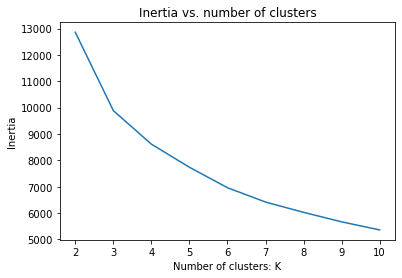

In [27]:
plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

In [ ]:
stop

In [29]:
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled', 
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 'cl_Most_Variety_scaled',
 'cl_Popular_Bottles_scaled',
 
 'cl_Volume_For_Dollar_scaled']

model = KMeans(n_clusters=2, random_state=42)

model.fit(stores_clust_info_combined4[cluster_cols])

stores_clust_info_combined4['n_clusters_2'] = model.predict(stores_clust_info_combined4[cluster_cols])

In [30]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [31]:
stores_clust_info_combined4.groupby(['n_clusters_2']).agg({'tot_num_unique_items':['mean','median'],
                                                         'rev_Cheap':['mean','median'],
                                                          'rev_Moderately_High':['mean','median'],
                                                          'rev_Most_Variety':['mean','median'],
                                                          'rev_Popular_Bottles':['mean','median'],
                                                          'rev_Volume_For_Dollar':['mean','median'],
                                                          'cl_Cheap':['mean','median'],
                                                          'cl_High_End':['mean','median'],
                                                          'cl_Moderately_High':['mean','median'],
                                                          'cl_Most_Variety':['mean','median'],
                                                          'cl_Popular_Bottles':['mean','median'],
                                                          
                                                          'cl_Volume_For_Dollar':['mean','median']})

tot_num_unique_items         rev_Cheap             \
                             mean median       mean     median   
n_clusters_2                                                     
0                      792.991713  692.5  21.332685  20.936364   
1                      155.344388  116.0  16.474578  15.658577   

             rev_Moderately_High           rev_Most_Variety            \
                            mean    median             mean    median   
n_clusters_2                                                            
0                       1.963980  1.654446         7.951848  7.557008   
1                       0.372518  0.009447         2.209034  1.482157   

             rev_Popular_Bottles            rev_Volume_For_Dollar             \
                            mean     median                  mean     median   
n_clusters_2                                                                   
0                      51.947924  52.612845             15.304265  15.082648   
1                      72.371600  74.281919              7.295662   4.388766   

               cl_Cheap            cl_High_End           cl_Moderately_High  \
                   mean     median        mean    median               mean   
n_clusters_2                                                                  
0             59.416640  60.294118    7.762959  5.732484          10.049327   
1             27.830507  27.941176    0.460240  0.000000           0.655644   

                       cl_Most_Variety            cl_Popular_Bottles  \
                median            mean     median               mean   
n_clusters_2                                                           
0             8.209806       17.612476  15.279673          75.111813   
1             0.114025        2.170281   1.091405          54.370141   

                        cl_Volume_For_Dollar             
                 median                 mean     median  
n_clusters_2                                             
0             78.571429            23.997858  22.466960  
1             57.142857             4.243459   1.982379

In [ ]:
# cluster_cols = ['tot_num_unique_items_scaled',
#  'rev_Cheap_scaled',
#  'rev_Moderately_High_scaled',
#  'rev_Most_Variety_scaled',
#  'rev_Popular_Bottles_scaled',
#  'rev_Volume_For_Dollar_scaled', 
#  'cl_Cheap_scaled',
#  'cl_High_End_scaled',
#  'cl_Moderately_High_scaled',
#  'cl_Most_Variety_scaled',
#  'cl_Popular_Bottles_scaled',
 
#  'cl_Volume_For_Dollar_scaled']

# model = KMeans(n_clusters=4, random_state=42)

# model.fit(stores_clust_info_combined2[cluster_cols])

# stores_clust_info_combined2['n_clusters_4'] = model.predict(stores_clust_info_combined2[cluster_cols])

In [32]:
stores_clust_info_combined4.groupby(['n_clusters_2']).agg({'Store_Number':'count','num_unique_clusters':['mean','median','std'],'tot_num_unique_items':['mean','median','std'],
                                                         'rev_Cheap':['mean','median','std'],
                                                           'rev_High_End':['mean','median','std'],
                                                          'rev_Moderately_High':['mean','median','std'],
                                                          'rev_Most_Variety':['mean','median','std'],
                                                          'rev_Popular_Bottles':['mean','median','std'],
                                                          'rev_Volume_For_Dollar':['mean','median','std'],
                                                          'cl_Cheap':['mean','median','std'],
                                                         'cl_High_End':['mean','median','std'],
                                                          'cl_Moderately_High':['mean','median','std'],
                                                          'cl_Most_Variety':['mean','median','std'],
                                                          'cl_Popular_Bottles':['mean','median','std'],
                                                          
                                                          'cl_Volume_For_Dollar':['mean','median','std']})

Store_Number num_unique_clusters                   \
                    count                mean median       std   
n_clusters_2                                                     
0                     362            6.922652    7.0  0.323735   
1                    1568            5.684311    6.0  0.901227   

             tot_num_unique_items                    rev_Cheap             \
                             mean median        std       mean     median   
n_clusters_2                                                                
0                      792.991713  692.5  358.61985  21.332685  20.936364   
1                      155.344388  116.0  103.56665  16.474578  15.658577   

                       rev_High_End                     rev_Moderately_High  \
                   std         mean    median       std                mean   
n_clusters_2                                                                  
0             5.293022     0.126042  0.074767  0.151992            1.963980   
1             6.304251     0.018735  0.000000  0.098642            0.372518   

                                 rev_Most_Variety                      \
                median       std             mean    median       std   
n_clusters_2                                                            
0             1.654446  1.491647         7.951848  7.557008  3.320496   
1             0.009447  0.885218         2.209034  1.482157  1.875985   

             rev_Popular_Bottles                       rev_Volume_For_Dollar  \
                            mean     median        std                  mean   
n_clusters_2                                                                   
0                      51.947924  52.612845   8.478629             15.304265   
1                      72.371600  74.281919  11.022638              7.295662   

                                    cl_Cheap                        \
                 median       std       mean     median        std   
n_clusters_2                                                         
0             15.082648  6.454823  59.416640  60.294118  15.115510   
1              4.388766  7.045553  27.830507  27.941176  11.219035   

             cl_High_End                     cl_Moderately_High            \
                    mean    median       std               mean    median   
n_clusters_2                                                                
0               7.762959  5.732484  7.063418          10.049327  8.209806   
1               0.460240  0.000000  1.232182           0.655644  0.114025   

                       cl_Most_Variety                       \
                   std            mean     median       std   
n_clusters_2                                                  
0             7.528162       17.612476  15.279673  9.603199   
1             1.270546        2.170281   1.091405  2.375397   

             cl_Popular_Bottles                       cl_Volume_For_Dollar  \
                           mean     median        std                 mean   
n_clusters_2                                                                 
0                     75.111813  78.571429  15.299362            23.997858   
1                     54.370141  57.142857  15.268362             4.243459   

                                    
                 median        std  
n_clusters_2                        
0             22.466960  10.953019  
1              1.982379   4.943743

In [33]:
cols = ['Store_Name',  'City', 'Zip_Code',
        'County', 
       'store_revenue', 'tot_num_unique_items', 'num_unique_clusters',
       'tot_item_count', 'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 
       'rev_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Quick_Shots', 'cl_Volume_For_Dollar']

In [35]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.n_clusters_2==1,cols]

,Store_Name,City,Zip_Code,County,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
0,Dyno's Wine and Spirits / Storm Lake,Storm Lake,50588,BUENA VIST,2.205003e+07,30,4,30,19.885875,0.000000,0.000000,7.122834,69.277547,0.000000,5.147059,0.000000,0.000000,0.500227,11.904762,1.605505,0.000000
1,Dyno's #53 / Sibley,Sibley,51249,OSCEOLA,4.840869e+07,36,5,36,22.807672,0.000000,0.000000,3.518718,61.942383,10.597907,6.617647,0.000000,0.000000,0.545703,14.285714,0.688073,1.321586
2,Dyno's #40 / Spencer,Spencer,51301,CLAY,2.430900e+07,14,4,14,6.779766,0.000000,0.000000,0.196122,86.981180,6.042932,2.205882,0.000000,0.000000,0.045475,16.666667,0.000000,0.660793
3,Dyno's #29 / Emmetsburg,Emmetsburg,50536,PALO ALTO,1.172332e+07,33,5,33,24.317735,0.000000,0.000000,8.176523,27.538225,37.016306,3.676471,0.000000,0.000000,0.454752,7.142857,2.064220,1.321586
4,Dyno's #41 / Albert City,Albert City,50510,BUENA VIST,6.766721e+06,13,4,13,49.136943,0.000000,0.000000,6.083004,44.516705,0.000000,3.676471,0.000000,0.000000,0.181901,7.142857,0.229358,0.000000
5,Double D Liquor Store,Waukon,52172,ALLAMAKEE,2.363361e+07,39,6,39,11.409680,0.000000,3.461497,9.476002,54.385544,21.179086,6.617647,0.000000,0.228050,0.591178,7.142857,0.458716,2.202643
6,Hop N Shop / Clinton,Clinton,52732,CLINTON,2.380632e+07,26,5,28,35.245436,0.000000,2.805094,0.130825,56.566670,0.000000,5.147059,0.000000,0.114025,0.090950,14.285714,2.293578,0.000000
7,DYNO'S 51 / SANBORN,Sanborn,51248,OBRIEN,3.975029e+07,25,5,25,4.226546,0.000000,0.000000,0.627989,78.742895,15.344294,2.205882,0.000000,0.000000,0.090950,21.428571,0.917431,1.541850
8,Hartley Wine And Spirits,Hartley,51346,OBRIEN,2.220802e+07,21,5,21,3.924476,0.000000,0.000000,4.374280,88.130756,2.225121,1.470588,0.000000,0.000000,0.318327,14.285714,0.917431,0.440529
9,Dyno's Wine and Spirits / Pocahontas,Pocahontas,50574,POCAHONTAS,9.061195e+07,88,6,92,20.194007,0.000000,1.770364,7.421045,62.568442,7.473270,14.705882,0.000000,0.342075,1.909959,26.190476,0.688073,1.982379


In [36]:
clust1_of_2_no_outlier_stores = stores_clust_info_combined4.loc[stores_clust_info_combined4.n_clusters_2==1,cols]

In [37]:
clust1_of_2_no_outlier_stores.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\clust1_of_2_no_outlier_stores.csv')

In [ ]:
# stores_clust_info_combined3 = stores_clust_info_combined2.copy()

In [ ]:
# stores_clust_info_combined3.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined3.csv')